In [ ]:
# Operating System module for interacting with the operating system
import os

# TensorFlow and Keras for deep learning framework and tools
import tensorflow as tf
import keras

# OpenCV for image processing and computer vision tasks
import cv2

# Pandas for data manipulation and analysis
import pandas as pd

# NumPy for numerical computing with arrays and matrices
import numpy as np

# Matplotlib for data visualization
import matplotlib.pyplot as plt
plt.style.use('default')  # Set default style for Matplotlib

# Scikit-learn for machine learning utilities
from sklearn.model_selection import train_test_split

# TensorFlow's Keras-specific modules for image preprocessing and callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *  # Importing all layers, might not be the best practice

# TensorFlow's pre-built ResNet50V2 model for transfer learning
from tensorflow.keras.applications import ResNet50V2

# **Data Preprocessing**

In [ ]:
row, col = 48, 48  # Image dimensions
classes = 7  # Number of classes

train_dir = '/kaggle/input/fer2013/train/'  # Training data directory
test_dir = '/kaggle/input/fer2013/test/'  # Test data directory

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])  # Create DataFrame for counts
    return df

train_count = count_exp(train_dir, 'Train')  # Count train data
test_count = count_exp(test_dir, 'Test')  # Count test data

combined_counts = pd.concat([train_count, test_count])  # Combine counts
transposed_counts = combined_counts.transpose()  # Transpose DataFrame
styled_table = transposed_counts.style.background_gradient(cmap='Pastel1')  # Style table
styled_table  # Display styled table

,Train,Test
surprise,3171,831
fear,4097,1024
angry,3995,958
neutral,4965,1233
sad,4830,1247
disgust,436,111
happy,7215,1774


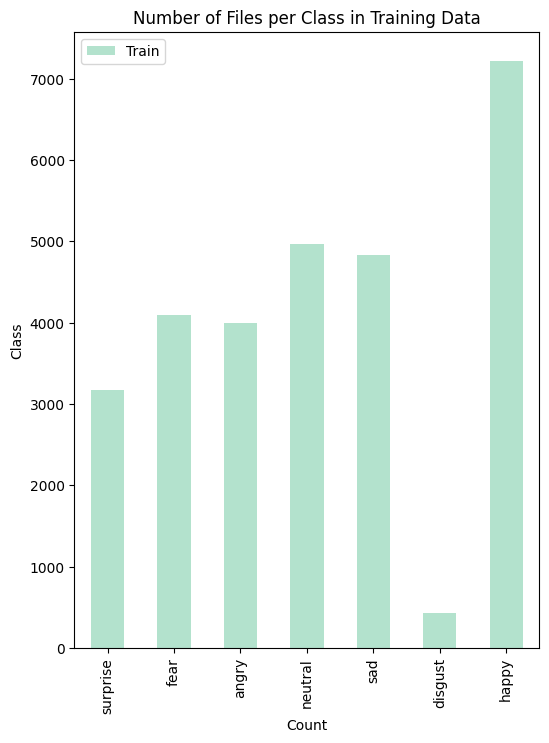

In [ ]:
# Transpose the DataFrame and plot a Train bar chart
train_count.transpose().plot(kind='bar' ,figsize=(6, 8), colormap='Pastel2')

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Number of Files per Class in Training Data')

# Show the plot
plt.show()

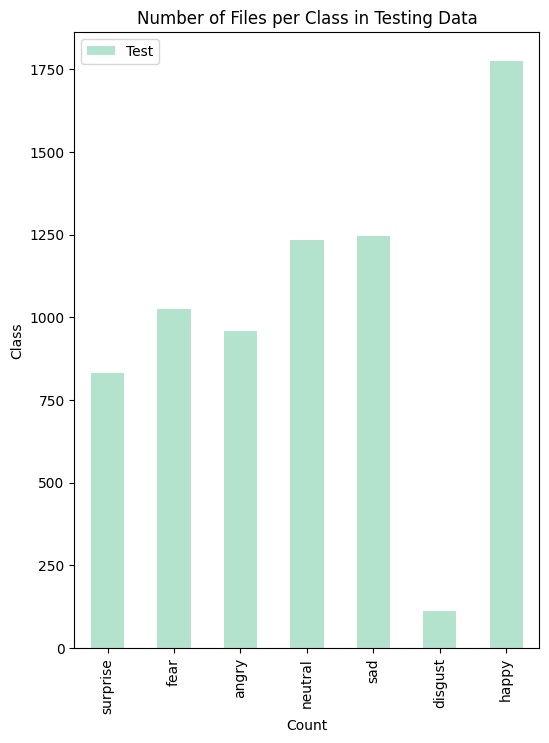

In [ ]:
# Transpose the DataFrame and plot a Test bar chart
test_count.transpose().plot(kind='bar' ,figsize=(6, 8), colormap='Pastel2')

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Number of Files per Class in Testing Data')

# Show the plot
plt.show()

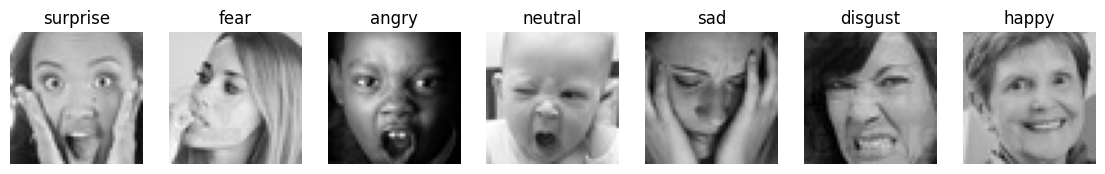

In [ ]:
# Display images from each expression directory if at least six images exist
plt.figure(figsize=(14, 22))
i = 1

for expression in os.listdir(train_dir):
    files_in_expression = os.listdir(os.path.join(train_dir, expression))

    # Check if there are at least six files in the directory
    if len(files_in_expression) >= 6:
        img = load_img(os.path.join(train_dir, expression, files_in_expression[5]))
        plt.subplot(1, 7, i)
        plt.imshow(img)
        plt.title(expression)
        plt.axis('off')
        i += 1

plt.show()


In [ ]:
# Define image shape and batch size
img_shape = 48
batch_size = 64


In [ ]:
# Image data preprocessing for training and testing datasets using ImageDataGenerator
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)


test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Building CNN Model**

In [ ]:
# Function to create a Convolutional Neural Network (CNN) model with multiple convolutional
#and dense layers
def Create_CNN_Model():

    model = Sequential()

    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))


    #Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7,activation='softmax'))

    return model

In [ ]:
# Compile the CNN model using Adam optimizer and categorical cross-entropy loss

CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 46, 46, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                      

In [ ]:
# Define a checkpoint to save the best model based on validation accuracy
checkpoint_path = "CNN_Model.h5"
Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create an early stopping callback to prevent overfitting by monitoring validation accuracy
Early_Stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1)

# Create ReduceLROnPlateau callback to adjust learning rate on validation loss plateau
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

# Combine all callbacks into a list
callbacks = [Early_Stopping, Reducing_LR]

# Calculate steps per epoch and validation steps for model training
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size


In [ ]:
# Train the CNN model using the provided training and validation data
CNN_history = CNN_Model.fit(train_data, validation_data=test_data, epochs=50, batch_size=batch_size,
                            callbacks=callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50
448/448 [==============================] - 335s 727ms/step - loss: 2.0546 - accuracy: 0.2073 - val_loss: 1.8376 - val_accuracy: 0.2539 - lr: 0.0010
Epoch 2/50
448/448 [==============================] - 309s 689ms/step - loss: 1.7853 - accuracy: 0.2687 - val_loss: 1.6554 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 3/50
448/448 [==============================] - 313s 697ms/step - loss: 1.6466 - accuracy: 0.3476 - val_loss: 1.7015 - val_accuracy: 0.3274 - lr: 0.0010
Epoch 4/50
448/448 [==============================] - 318s 710ms/step - loss: 1.5217 - accuracy: 0.4058 - val_loss: 1.3851 - val_accuracy: 0.4639 - lr: 0.0010
Epoch 5/50
448/448 [==============================] - 321s 716ms/step - loss: 1.4285 - accuracy: 0.4497 - val_loss: 1.3035 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 6/50
448/448 [==============================] - 311s 694ms/step - loss: 1.3619 - accuracy: 0.4838 - val_loss: 1.2554 - val_accuracy: 0.5045 - lr: 0.0010
Epoch 7/50
448/448 [==========================

In [ ]:
CNN_Model.save('CNN_Model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Replace 'saved_model_path' with the path where your CNN model is saved
saved_model_path = 'CNN_Model.h5'

# Load the saved model
loaded_model = load_model(saved_model_path)

# Evaluate the loaded model on test data
evaluation = loaded_model.evaluate(test_data)

# Calculate test accuracy as a percentage
test_accuracy = evaluation[1] * 100

# Print the evaluation metrics with formatting
print(f"Test Loss: {evaluation[0]:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


113/113 [==============================] - 16s 142ms/step - loss: 0.9152 - accuracy: 0.6641
Test Loss: 0.92
Test Accuracy: 66.41%


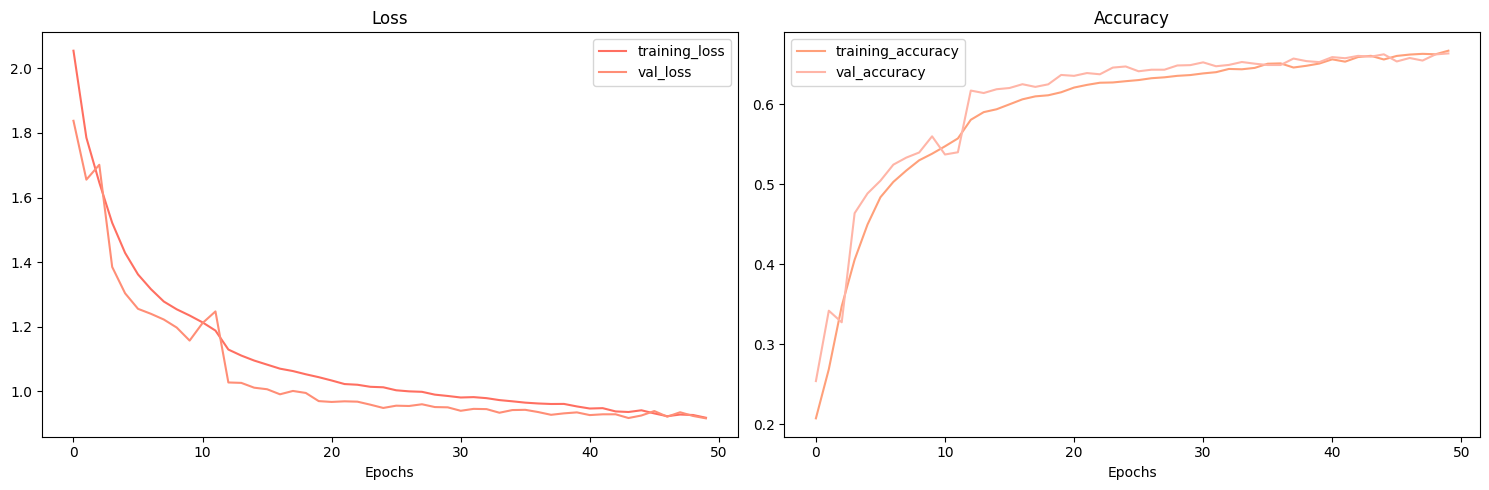

In [ ]:
import matplotlib.pyplot as plt

# Define pastel coral color palette
colors = ['#FF6F61', '#FF8E76', '#FFA07A', '#FFB5A7']

# Assuming 'history' contains your model's training history
loss = CNN_history.history["loss"]
val_loss = CNN_history.history["val_loss"]

accuracy = CNN_history.history["accuracy"]
val_accuracy = CNN_history.history["val_accuracy"]

epochs = range(len(CNN_history.history["loss"]))

plt.figure(figsize=(15, 5))

# Plot loss with pastel coral colors
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="training_loss", color=colors[0])
plt.plot(epochs, val_loss, label="val_loss", color=colors[1])
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot accuracy with pastel coral colors
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="training_accuracy", color=colors[2])
plt.plot(epochs, val_accuracy, label="val_accuracy", color=colors[3])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.tight_layout()
plt.show()


113/113 [==============================] - 17s 145ms/step


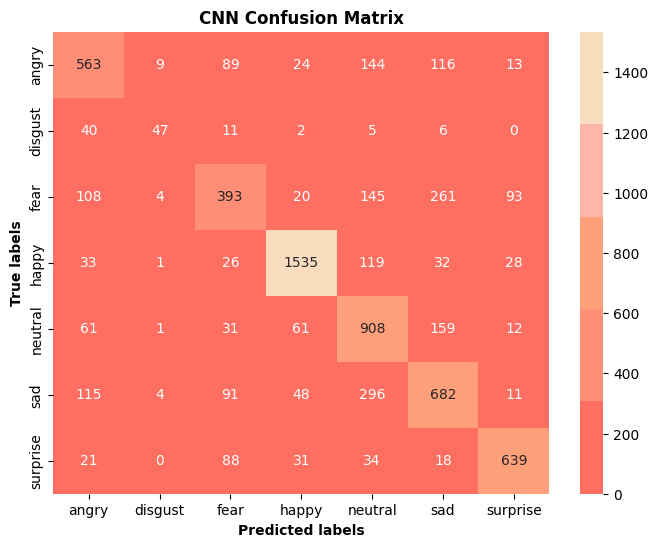

In [ ]:
# Generate CNN predictions and true labels, compute confusion matrix on test data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict classes for test data
CNN_Predictions = CNN_Model.predict(test_data)
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

# Get true labels from test data
true_labels = test_data.classes

# Get class labels from training data
class_indices = test_data.class_indices
class_labels = list(class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(true_labels, CNN_Predictions)

# Set a pastel color palette
colors = ['#FF6F61', '#FF8E76', '#FFA07A', '#FFB5A7', '#F9DBBD']

# Create a heatmap with the specified color palette and class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap=colors, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels', fontsize=10, fontweight='bold')
plt.ylabel('True labels', fontsize=10, fontweight='bold')
plt.title('CNN Confusion Matrix', fontsize=12, fontweight='bold')
plt.show()


In [ ]:
CNN_Model = load_model('CNN_Model.h5')

Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7178 images belonging to 7 classes.


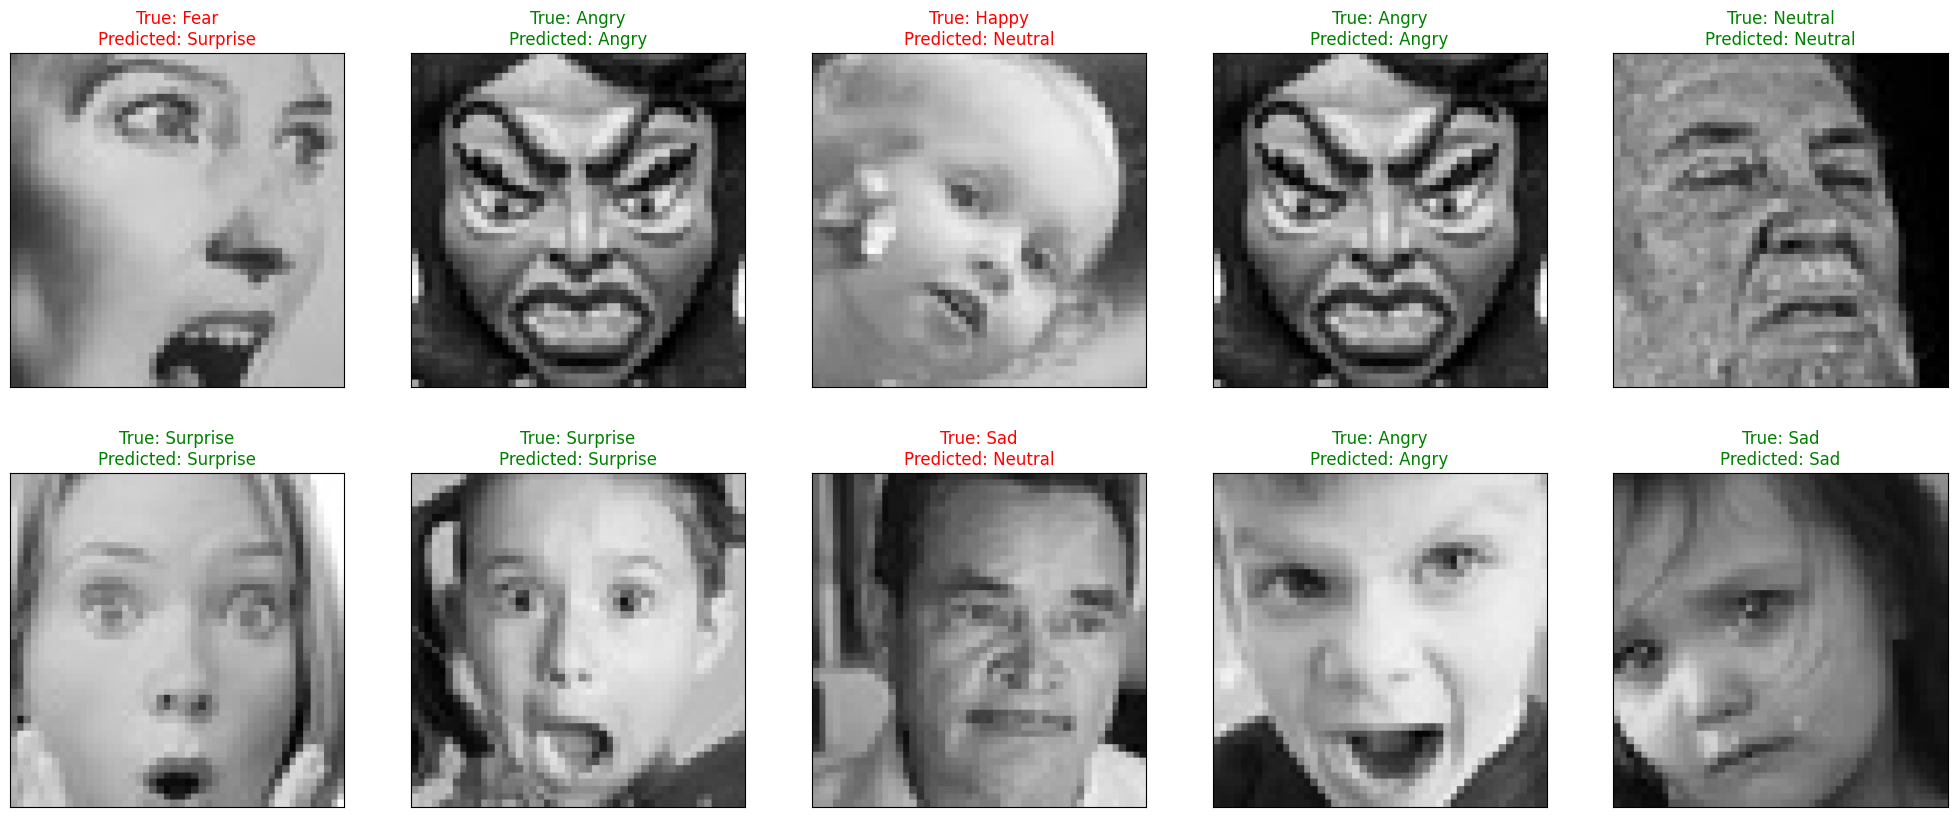

<Figure size 640x480 with 0 Axes>

In [ ]:
from tensorflow.image import resize

# Display 10 random pictures from the dataset with their labels and predictions
Random_batch = np.random.randint(0, len(test_data) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_data[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_data[Random_batch][1][Random_Img_Index[i]])
    # Resize the images to match the model's input size
    resized_images = resize(Random_Img, (48, 48))

    # Perform the prediction on the resized images
    Model_Prediction = np.argmax(CNN_Model.predict(tf.expand_dims(resized_images, axis=0), verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
        color = "green"
    else:
        color = "red"

    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.show()
plt.tight_layout()